In [40]:
import pandas as pd


train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

# Not use 'ID' column.
x_train = train.filter(regex='X')
y_train = train.filter(regex='Y')

# Missing values

<AxesSubplot:title={'center':'y_train'}>

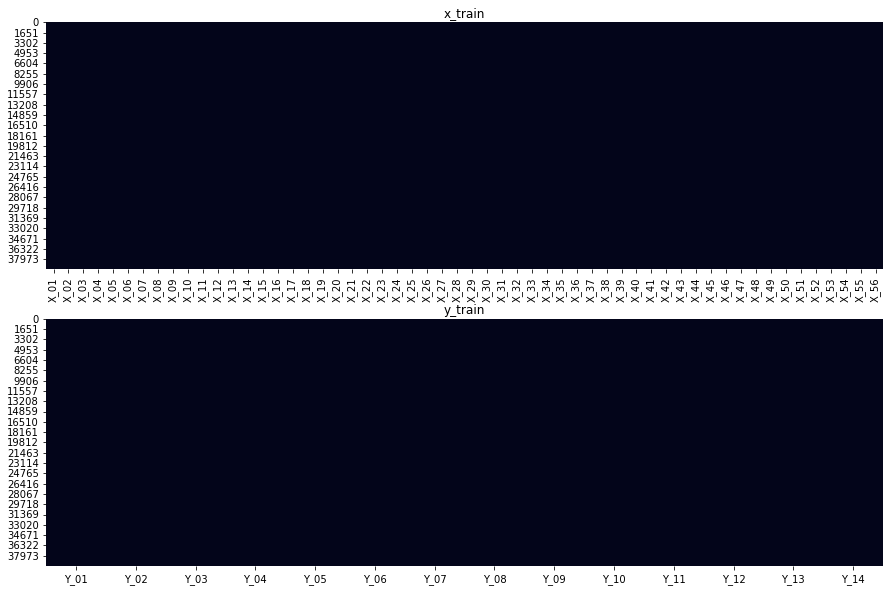

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

ax = plt.subplot(2,1,1)
plt.title('x_train') 
sns.heatmap(x_train.isnull(), cbar=False)

ax = plt.subplot(2,1,2)
plt.title('y_train')
sns.heatmap(y_train.isnull(), cbar=False)

# Group features by each name

In [42]:
x_info = pd.read_csv('../dataset/meta/x_feature_info.csv')
y_info = pd.read_csv('../dataset/meta/y_feature_info.csv')

In [43]:
def make_namegroup(df, info):
    import re, collections
    
    namegroup = collections.defaultdict(list)
    info = info.set_index('Feature').T.to_dict('list')
    for feature in info:
        name = ' '.join(re.sub(r'[0-9]','n',*info[feature]).split())
        namegroup[name].append(feature)
    
    return namegroup

In [44]:
x_name = make_namegroup(x_train, x_info)
x_name

defaultdict(list,
            {'PCB 체결 시 단계별 누름량(Step n)': ['X_01', 'X_02', 'X_05', 'X_06'],
             '방열 재료 n 무게': ['X_03', 'X_10', 'X_11'],
             'n차 검사 통과 여부': ['X_04', 'X_23', 'X_47', 'X_48'],
             '방열 재료 n 면적': ['X_07', 'X_08', 'X_09'],
             '커넥터 위치 기준 좌표': ['X_12'],
             '각 안테나 패드 위치(높이) 차이': ['X_13'],
             'n번 안테나 패드 위치': ['X_14', 'X_15', 'X_16', 'X_17', 'X_18'],
             'n번 스크류 삽입 깊이': ['X_19', 'X_20', 'X_21', 'X_22'],
             '커넥터 n번 핀 치수': ['X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29'],
             '스크류 삽입 깊이n': ['X_30', 'X_31', 'X_32', 'X_33'],
             '스크류 체결 시 분당 회전수 n': ['X_34', 'X_35', 'X_36', 'X_37'],
             '하우징 PCB 안착부 n 치수': ['X_38', 'X_39', 'X_40'],
             '레이돔 치수 (안테나 n번 부위)': ['X_41', 'X_42', 'X_43', 'X_44'],
             '안테나 부분 레이돔 기울기': ['X_45'],
             '실란트 본드 소요량': ['X_46'],
             'Cal 투입 전 대기 시간': ['X_49'],
             'RFn 부분 SMT 납 량': ['X_50',
              'X_51',
     

In [45]:
y_name = make_namegroup(y_train, y_info)
y_name

defaultdict(list,
            {'안테나 Gain 평균 (각도n)': ['Y_01', 'Y_05', 'Y_07', 'Y_11'],
             '안테나 n Gain 편차': ['Y_02', 'Y_03'],
             '평균 신호대 잡음비': ['Y_04'],
             '신호대 잡음비 (각도n)': ['Y_06',
              'Y_08',
              'Y_09',
              'Y_10',
              'Y_12',
              'Y_13',
              'Y_14']})

In [46]:
def create_group_csvs(df, namegroup, save_route):
    import os
    for name in namegroup:
        tmp = pd.DataFrame()
        for feature in namegroup[name]:
            tmp[feature] = df[feature].copy()
        os.makedirs(f"{save_route}", exist_ok=True)
        tmp.to_csv(f"{save_route}/{name}.csv", index=False)
        

def make_dataframe(df, namegroup, feature_name):
    tmp = pd.DataFrame()
    for feature in namegroup[feature_name]:
        tmp[feature] = df[feature].copy()
    return tmp
        

create_group_csvs(x_train, x_name, '../dataset/x_feature')
create_group_csvs(y_train, y_name, '../dataset/y_feature')

# Each Feature

## 1. PCB

### a) PCB 체결 시 단계별 누름량(Step n)

In [47]:
feature1 = pd.read_csv('../dataset/x_feature/PCB 체결 시 단계별 누름량(Step n).csv')
print(feature1.describe())
feature1

               X_01          X_02          X_05          X_06
count  39607.000000  39607.000000  39607.000000  39607.000000
mean      68.412040    103.320166    102.337203     70.597211
std        2.655983      0.000372      0.548353      2.259820
min       56.268000    103.320000    101.774000     61.726000
25%       66.465000    103.320000    101.949000     68.864000
50%       68.504000    103.320000    102.006000     69.884000
75%       69.524000    103.320000    103.144000     71.923000
max       84.820000    103.321000    103.160000     87.219000


,X_01,X_02,X_05,X_06
0,70.544,103.320,101.892,74.983
1,69.524,103.321,101.944,72.943
2,72.583,103.320,103.153,72.943
3,71.563,103.320,101.971,77.022
4,69.524,103.320,101.981,70.904
...,...,...,...,...
39602,66.465,103.320,103.150,66.825
39603,66.465,103.321,102.021,66.825
39604,68.504,103.320,103.144,68.864
39605,66.465,103.320,102.025,67.845


### b) 하우징 PCB 안착부 n 치수

In [63]:
feature17 = pd.read_csv('../dataset/x_feature/하우징 PCB 안착부 n 치수.csv')
print(feature17.describe())
feature17

               X_38          X_39          X_40
count  39607.000000  39607.000000  39607.000000
mean     -15.903737    -15.889576    -16.572162
std        0.595420      0.746665      0.344486
min      -17.090000    -17.090000    -17.720000
25%      -16.160000    -16.160000    -16.810000
50%      -15.990000    -15.990000    -16.640000
75%      -15.750000    -15.750000    -16.400000
max       32.230000     -2.650000    -14.800000


,X_38,X_39,X_40
0,-16.41,-16.36,-17.03
1,-16.06,-16.11,-16.74
2,-16.16,-16.17,-16.76
3,-16.05,-16.03,-16.67
4,-16.25,-16.23,-16.85
...,...,...,...
39602,-16.09,-16.15,-16.79
39603,-15.70,-15.74,-16.40
39604,-16.12,-16.19,-16.80
39605,-16.36,-16.36,-16.97


## 2. 안테나 & 레이돔

### a) n번 안테나 패드 위치

In [50]:
feature4 = pd.read_csv('../dataset/x_feature/n번 안테나 패드 위치.csv')
print(feature4.describe())
feature4

               X_14          X_15          X_16          X_17          X_18
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000
mean      13.372201     13.381914     13.463860     13.512589     13.449263
std        0.029865      0.029468      0.036741      0.023436      0.029093
min       13.150000     13.230000     13.260000     13.410000     13.260000
25%       13.350000     13.360000     13.440000     13.500000     13.430000
50%       13.370000     13.380000     13.470000     13.510000     13.450000
75%       13.390000     13.410000     13.490000     13.530000     13.470000
max       13.490000     13.500000     13.610000     13.610000     13.570000


,X_14,X_15,X_16,X_17,X_18
0,13.34,13.37,13.40,13.52,13.44
1,13.33,13.33,13.46,13.51,13.42
2,13.36,13.36,13.39,13.51,13.43
3,13.30,13.33,13.39,13.51,13.40
4,13.35,13.34,13.41,13.50,13.42
...,...,...,...,...,...
39602,13.37,13.38,13.51,13.52,13.46
39603,13.36,13.36,13.47,13.49,13.44
39604,13.38,13.39,13.47,13.52,13.46
39605,13.36,13.38,13.45,13.52,13.46


### b) 각 안테나 패드 위치(높이) 차이

In [53]:
feature7 = pd.read_csv('../dataset/x_feature/각 안테나 패드 위치(높이) 차이.csv')
print(feature7.describe())
feature7

               X_13
count  39607.000000
mean       0.143335
std        0.025334
min        0.050000
25%        0.130000
50%        0.140000
75%        0.160000
max        0.280000


,X_13
0,0.18
1,0.18
2,0.15
3,0.21
4,0.16
...,...
39602,0.15
39603,0.13
39604,0.14
39605,0.16


### c) 안테나 부분 레이돔 기울기

In [60]:
feature14 = pd.read_csv('../dataset/x_feature/안테나 부분 레이돔 기울기.csv')
print(feature14.describe())
feature14

               X_45
count  39607.000000
mean       0.154567
std        0.046968
min        0.000000
25%        0.120000
50%        0.150000
75%        0.190000
max        0.420000


,X_45
0,0.29
1,0.13
2,0.14
3,0.22
4,0.22
...,...
39602,0.11
39603,0.12
39604,0.13
39605,0.11


### d) 레이돔 치수 (안테나 n번 부위)

In [54]:
feature8 = pd.read_csv('../dataset/x_feature/레이돔 치수 (안테나 n번 부위).csv')
print(feature8.describe())
feature8

               X_41          X_42          X_43          X_44
count  39607.000000  39607.000000  39607.000000  39607.000000
mean      21.186992     21.059334     21.203705     21.160107
std        0.031128      0.040288      0.047211      0.042176
min       20.730000     20.790000     20.800000     20.930000
25%       21.170000     21.030000     21.170000     21.130000
50%       21.190000     21.060000     21.200000     21.160000
75%       21.210000     21.090000     21.240000     21.190000
max       21.620000     21.440000     21.410000     21.320000


,X_41,X_42,X_43,X_44
0,21.20,20.99,21.28,21.09
1,21.16,21.03,21.16,21.13
2,21.13,21.03,21.17,21.12
3,21.18,20.98,21.20,21.09
4,21.16,20.96,21.18,21.10
...,...,...,...,...
39602,21.17,21.08,21.19,21.19
39603,21.16,21.09,21.21,21.19
39604,21.17,21.09,21.22,21.19
39605,21.15,21.05,21.16,21.13


## 3. 스크류

### a) n번 스크류 삽입 깊이

In [49]:
feature3 = pd.read_csv('../dataset/x_feature/n번 스크류 삽입 깊이.csv')
print(feature3.describe())
feature3

               X_19          X_20          X_21          X_22
count  39607.000000  39607.000000  39607.000000  39607.000000
mean       3.240229      3.184493      3.174270      3.232673
std        0.110482      0.105266      0.106868      0.108981
min        2.860000      2.830000      2.830000      2.850000
25%        3.160000      3.100000      3.090000      3.140000
50%        3.220000      3.180000      3.160000      3.230000
75%        3.310000      3.270000      3.250000      3.320000
max        3.750000      3.670000      3.680000      3.790000


,X_19,X_20,X_21,X_22
0,3.11,3.17,3.06,3.13
1,2.97,3.11,2.91,3.20
2,3.04,3.04,3.01,3.12
3,3.05,3.01,3.02,3.08
4,3.04,3.07,3.00,3.12
...,...,...,...,...
39602,3.20,3.03,3.06,3.13
39603,3.15,3.06,3.05,3.06
39604,3.23,3.09,3.07,3.12
39605,3.18,3.01,3.15,3.09


### b) 스크류 삽입 깊이n

In [57]:
feature11 = pd.read_csv('../dataset/x_feature/스크류 삽입 깊이n.csv')
print(feature11.describe())
feature11

               X_30          X_31          X_32          X_33
count  39607.000000  39607.000000  39607.000000  39607.000000
mean       1.378994      1.571141      1.362929      1.595723
std        0.030412      0.074520      0.029945      0.108028
min        0.570000      0.600000      0.570000      0.610000
25%        1.370000      1.530000      1.350000      1.550000
50%        1.370000      1.550000      1.360000      1.570000
75%        1.380000      1.600000      1.370000      1.610000
max        2.110000      7.210000      2.450000      7.810000


,X_30,X_31,X_32,X_33
0,1.49,1.69,1.46,1.74
1,1.49,1.67,1.45,1.66
2,1.49,1.69,1.46,1.68
3,1.47,1.68,1.47,1.68
4,1.49,1.68,1.47,1.82
...,...,...,...,...
39602,1.37,1.60,1.36,1.67
39603,1.40,1.68,1.37,1.77
39604,1.39,1.61,1.37,1.58
39605,1.37,1.56,1.36,1.67


### c) 스크류 체결 시 분당 회전수 n

In [58]:
feature12 = pd.read_csv('../dataset/x_feature/스크류 체결 시 분당 회전수 n.csv')
print(feature12.describe())
feature12

               X_34          X_35          X_36          X_37
count  39607.000000  39607.000000  39607.000000  39607.000000
mean      12.950271     12.920343     12.941728     12.919139
std        0.044030      0.052238      0.047830      0.052292
min       12.840000     12.810000     12.840000     12.810000
25%       12.920000     12.870000     12.900000     12.870000
50%       12.960000     12.920000     12.950000     12.910000
75%       12.990000     12.970000     12.980000     12.970000
max       13.080000     13.090000     13.090000     13.080000


,X_34,X_35,X_36,X_37
0,12.99,12.88,12.89,12.99
1,12.92,12.87,12.89,12.93
2,12.97,12.87,12.87,13.00
3,12.91,12.97,12.99,12.92
4,12.96,12.85,12.91,12.96
...,...,...,...,...
39602,12.89,13.00,12.94,12.90
39603,12.88,12.88,12.89,12.86
39604,12.98,12.98,12.98,12.81
39605,12.91,12.90,12.96,12.97


## 4. 방열 재료

### a) 방열 재료 n 면적

In [55]:
feature9 = pd.read_csv('../dataset/x_feature/방열 재료 n 면적.csv')
print(feature9.describe())
feature9

               X_07          X_08          X_09
count  39607.000000  39607.000000  39607.000000
mean      29.407490    164.449320    225.397470
std        7.338204    220.402444     66.734725
min       14.140000     38.460000     37.580000
25%       27.890000    105.990000    188.540000
50%       28.840000    115.040000    234.450000
75%       29.870000    132.620000    263.960000
max      163.860000   2387.440000    637.490000


,X_07,X_08,X_09
0,29.45,62.38,245.71
1,28.73,61.23,233.61
2,28.81,105.77,272.20
3,28.92,115.21,255.36
4,29.68,103.38,241.46
...,...,...,...
39602,30.20,77.83,298.05
39603,29.21,102.25,270.67
39604,29.96,102.61,198.07
39605,30.30,112.60,275.52


### b) 방열 재료 n 무게

In [56]:
feature10 = pd.read_csv('../dataset/x_feature/방열 재료 n 무게.csv')
print(feature10.describe())
feature10

               X_03          X_10          X_11
count  39607.000000  39607.000000  39607.000000
mean      68.826354      0.002449      0.000366
std        5.151167      0.086255      0.014145
min       56.470000      0.000000      0.000000
25%       65.070000      0.000000      0.000000
50%       67.270000      0.000000      0.000000
75%       71.770000      0.000000      0.000000
max       89.170000      3.600000      0.700000


,X_03,X_10,X_11
0,67.47,0.0,0.0
1,65.17,0.0,0.0
2,64.07,0.0,0.0
3,67.57,0.0,0.0
4,63.57,0.0,0.0
...,...,...,...
39602,62.27,0.0,0.0
39603,62.77,0.0,0.0
39604,64.67,0.0,0.0
39605,63.67,0.0,0.0


## 5. 커넥터

### a) 커넥터 n번 핀 치수

In [61]:
feature15 = pd.read_csv('../dataset/x_feature/커넥터 n번 핀 치수.csv')
print(feature15.describe())
feature15

               X_24          X_25          X_26          X_27          X_28  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean       2.115674      2.093895      2.090377      2.098249      2.118594   
std        0.032440      0.033148      0.038512      0.038056      0.042782   
min        1.830000      1.960000      1.980000      1.990000      1.930000   
25%        2.090000      2.070000      2.060000      2.070000      2.090000   
50%        2.120000      2.090000      2.090000      2.090000      2.120000   
75%        2.140000      2.120000      2.120000      2.120000      2.140000   
max        2.350000      2.350000      2.350000      2.350000      2.350000   

               X_29  
count  39607.000000  
mean       2.173727  
std        0.046689  
min        2.020000  
25%        2.140000  
50%        2.170000  
75%        2.200000  
max        2.360000  


,X_24,X_25,X_26,X_27,X_28,X_29
0,2.05,2.07,2.05,2.06,2.06,2.35
1,2.10,2.10,2.10,2.10,2.17,2.28
2,2.07,2.06,2.04,2.07,2.10,2.26
3,2.06,2.05,2.03,2.06,2.07,2.12
4,2.09,2.06,2.09,2.12,2.33,2.13
...,...,...,...,...,...,...
39602,2.10,2.11,2.08,2.11,2.10,2.20
39603,2.12,2.12,2.09,2.12,2.11,2.20
39604,2.13,2.09,2.08,2.07,2.12,2.16
39605,2.07,2.03,2.05,2.05,2.10,2.12


### b) 커넥터 위치 기준 좌표

In [62]:
feature16 = pd.read_csv('../dataset/x_feature/커넥터 위치 기준 좌표.csv')
print(feature16.describe())
feature16

               X_12
count  39607.000000
mean       4.373228
std        0.021806
min        4.270000
25%        4.360000
50%        4.370000
75%        4.390000
max        4.490000


,X_12
0,4.34
1,4.38
2,4.36
3,4.33
4,4.35
...,...
39602,4.36
39603,4.40
39604,4.38
39605,4.33


## 6. Cal 투입 전 대기 시간

In [48]:
feature2 = pd.read_csv('../dataset/x_feature/Cal 투입 전 대기 시간.csv')
print(feature2.describe())
feature2

                X_49
count   39607.000000
mean    16676.913639
std      8584.427420
min      3341.830000
25%     13093.930000
50%     15273.330000
75%     17560.180000
max    114563.630000


,X_49
0,9706.03
1,10423.43
2,10948.53
3,15007.03
4,11051.03
...,...
39602,60630.73
39603,60763.43
39604,8813.33
39605,62222.33


## 7. n차 검사 통과 여부

In [51]:
feature5 = pd.read_csv('../dataset/x_feature/n차 검사 통과 여부.csv')
print(feature5.describe())
feature5

          X_04     X_23     X_47     X_48
count  39607.0  39607.0  39607.0  39607.0
mean       1.0      1.0      1.0      1.0
std        0.0      0.0      0.0      0.0
min        1.0      1.0      1.0      1.0
25%        1.0      1.0      1.0      1.0
50%        1.0      1.0      1.0      1.0
75%        1.0      1.0      1.0      1.0
max        1.0      1.0      1.0      1.0


,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39602,1,1,1,1
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1


## 8. RFn 부분 SMT 납 량

In [52]:
feature6 = pd.read_csv('../dataset/x_feature/RFn 부분 SMT 납 량.csv')
print(feature6.describe())
feature6

               X_50          X_51          X_52          X_53          X_54  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean     130.774557    131.457418    138.587595    127.992420    128.014110   
std        5.989845      5.934313      6.469813      5.713153      5.433958   
min       21.800000     21.910000     23.100000     21.330000     21.340000   
25%      126.948571    127.669758    134.475401    124.374525    124.697879   
50%      130.723378    131.352856    138.525575    128.020010    128.098728   
75%      134.538998    135.170761    142.702448    131.618662    131.487423   
max      162.619458    194.513195    173.438623    152.406630    175.052891   

               X_55          X_56  
count  39607.000000  39607.000000  
mean     137.884711    128.441119  
std        6.552101      5.444245  
min       22.980000     21.410000  
25%      133.744103    125.134713  
50%      137.900952    128.414501  
75%      142.073102    131.839764  


,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...
39602,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


## 9. 실란트 본드 소요량

In [59]:
feature13 = pd.read_csv('../dataset/x_feature/실란트 본드 소요량.csv')
print(feature13.describe())
feature13

               X_46
count  39607.000000
mean    1468.275305
std        2.121517
min     1457.000000
25%     1469.000000
50%     1469.000000
75%     1469.000000
max     1469.000000


,X_46
0,1463
1,1463
2,1468
3,1469
4,1469
...,...
39602,1469
39603,1458
39604,1459
39605,1469
